In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nxcom

In [2]:
Kc_graph = nx.karate_club_graph()

In [3]:
nx.info(Kc_graph)

/var/folders/zr/kc_sw3xj5xb_ygssw85ry0yc0000gn/T/ipykernel_78219/1346349862.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(Kc_graph)


'Graph named "Zachary\'s Karate Club" with 34 nodes and 78 edges'

1.	Load and visualize the graph

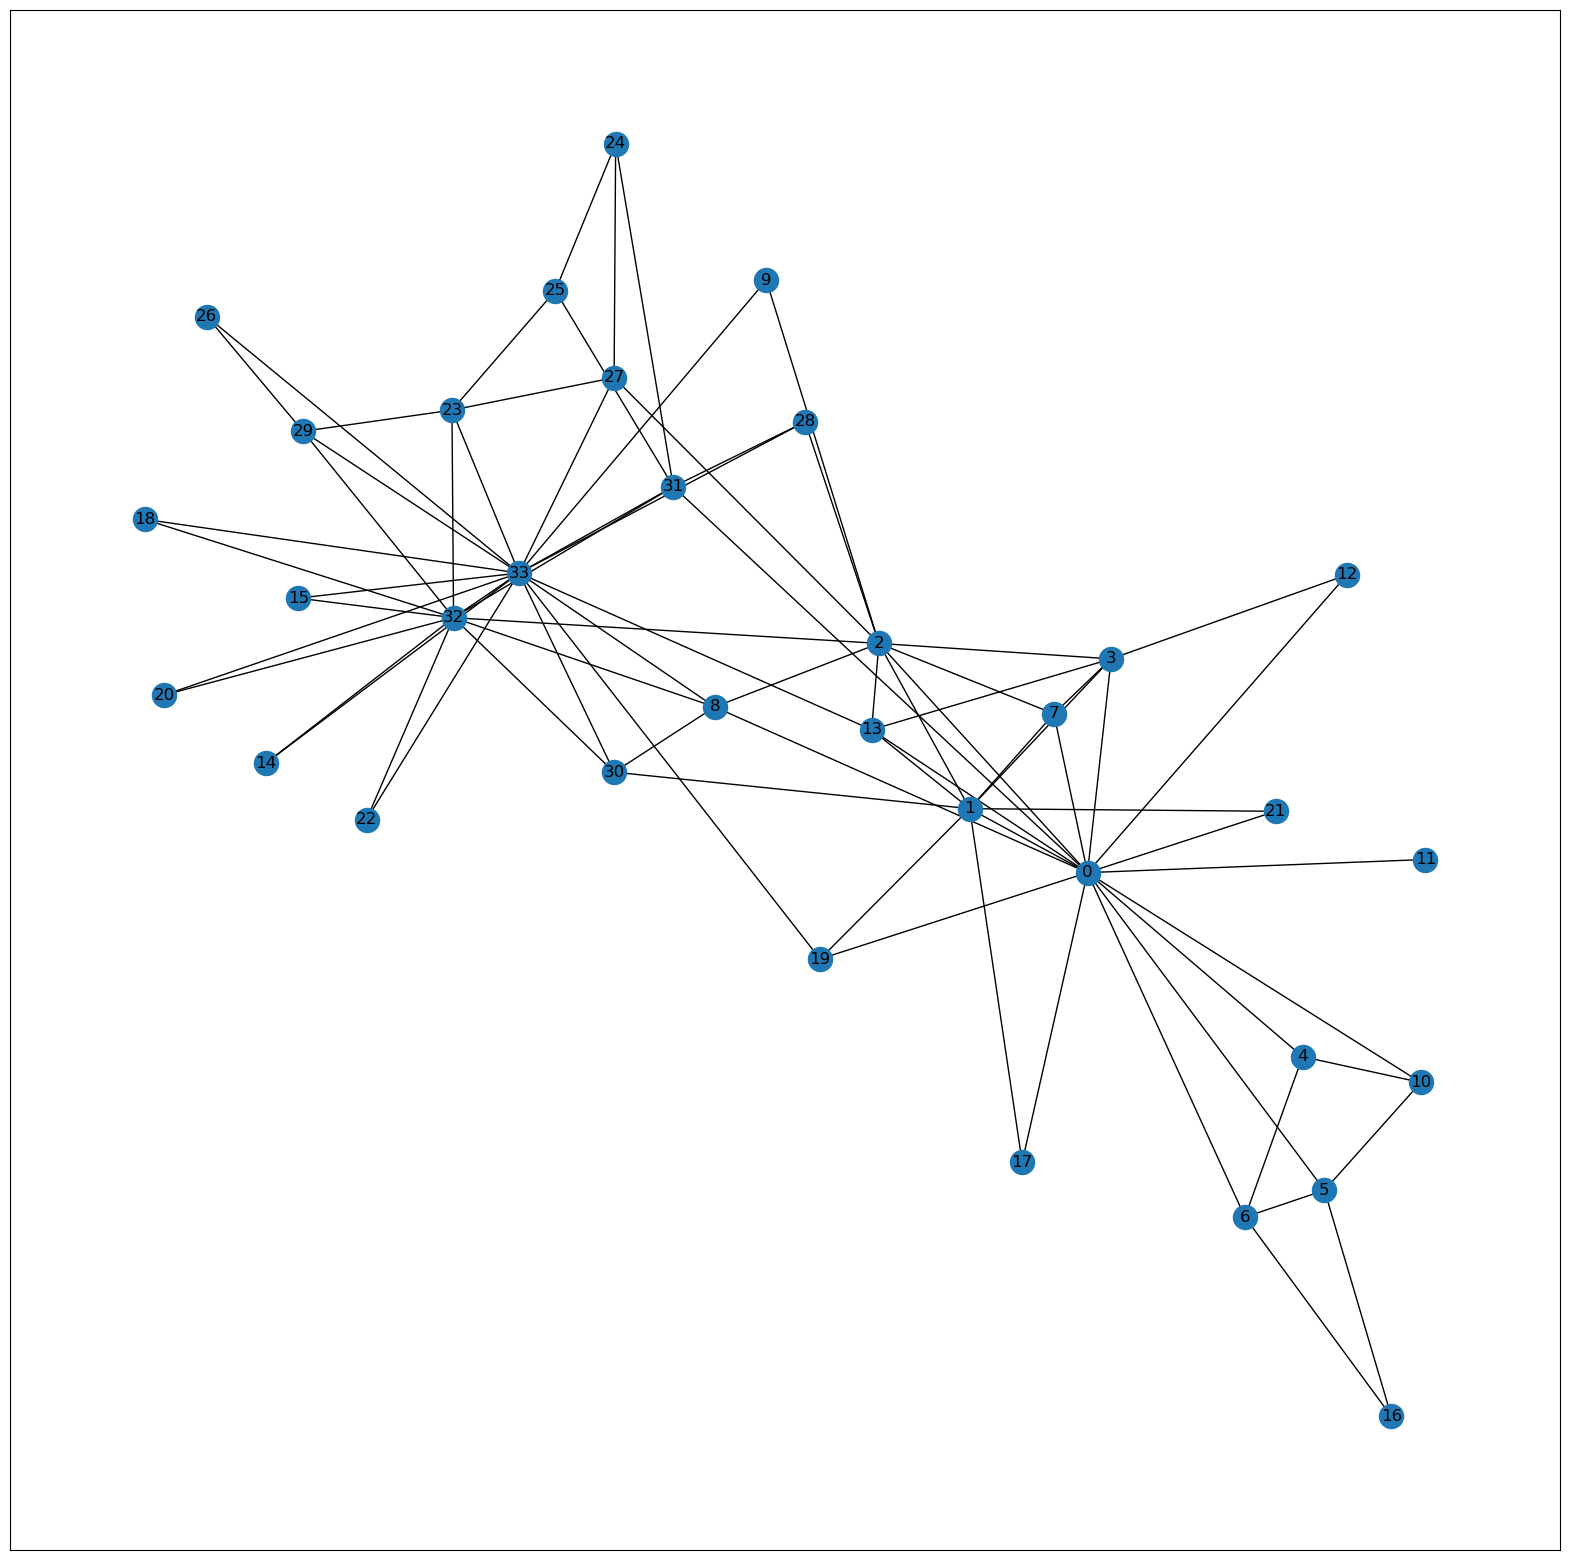

In [4]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(Kc_graph)

2.	Detect the number of connected components within this graph

In [5]:
nx.number_connected_components(Kc_graph)

1

3.	Detect communities in the graph and visualize it such that nodes belonging to a community have the same color which is different than the color assigned to other communities

Method 1: Community Louvain

In [6]:
from community import community_louvain
import matplotlib.cm as cm
# communities_generator = girvan_newman(subG)
partition = community_louvain.best_partition(Kc_graph)

In [7]:
partition

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 2,
 5: 2,
 6: 2,
 7: 0,
 8: 1,
 9: 1,
 10: 2,
 11: 0,
 12: 0,
 13: 0,
 14: 1,
 15: 1,
 16: 2,
 17: 0,
 18: 1,
 19: 0,
 20: 1,
 21: 0,
 22: 1,
 23: 1,
 24: 3,
 25: 3,
 26: 1,
 27: 1,
 28: 3,
 29: 1,
 30: 1,
 31: 3,
 32: 1,
 33: 1}

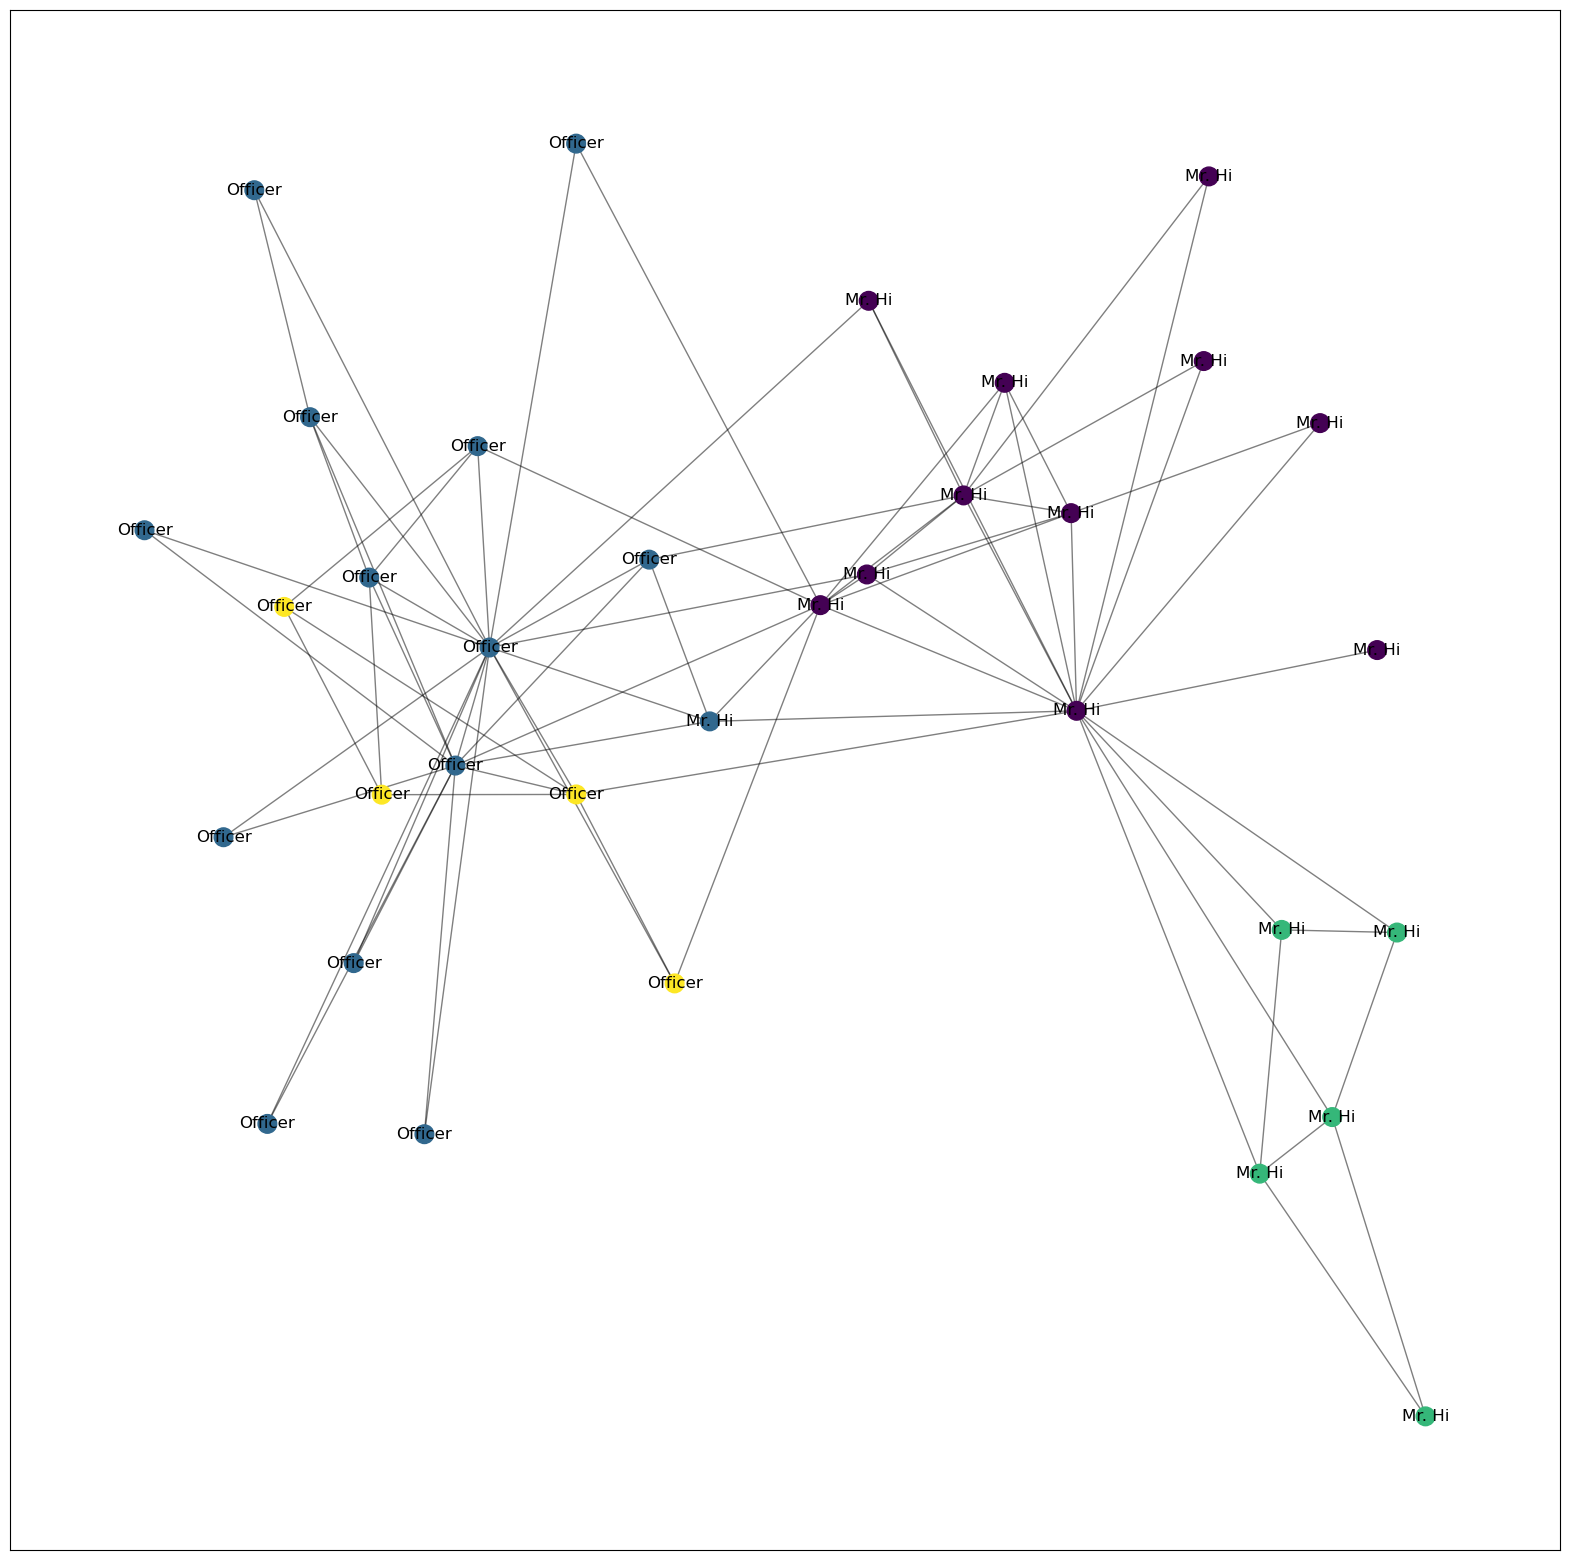

In [8]:
# draw the graph
labels = nx.get_node_attributes(Kc_graph,'club')
pos = nx.spring_layout(Kc_graph)
plt.figure(figsize=(20,20))

# color the nodes according to their partition
nx.draw_networkx_nodes(Kc_graph, pos, partition.keys(), node_size=180,
                       node_color=list(partition.values()))
nx.draw_networkx_edges(Kc_graph, pos, alpha=0.5)
nx.draw_networkx_labels(Kc_graph,pos,labels)

plt.show()

Method 2: Modularity-based communities

In [9]:
# Find the communities by Modularity-based communities
communities = list(nxcom.greedy_modularity_communities(Kc_graph))
# Count the communities
len(communities)

3

In [10]:
# categorizing nodes in communities in three lists
community_0 = sorted(communities[0])
community_1 = sorted(communities[1])
community_2 = sorted(communities[2])

In [11]:
print(community_0)
print(community_1)
print(community_2)

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


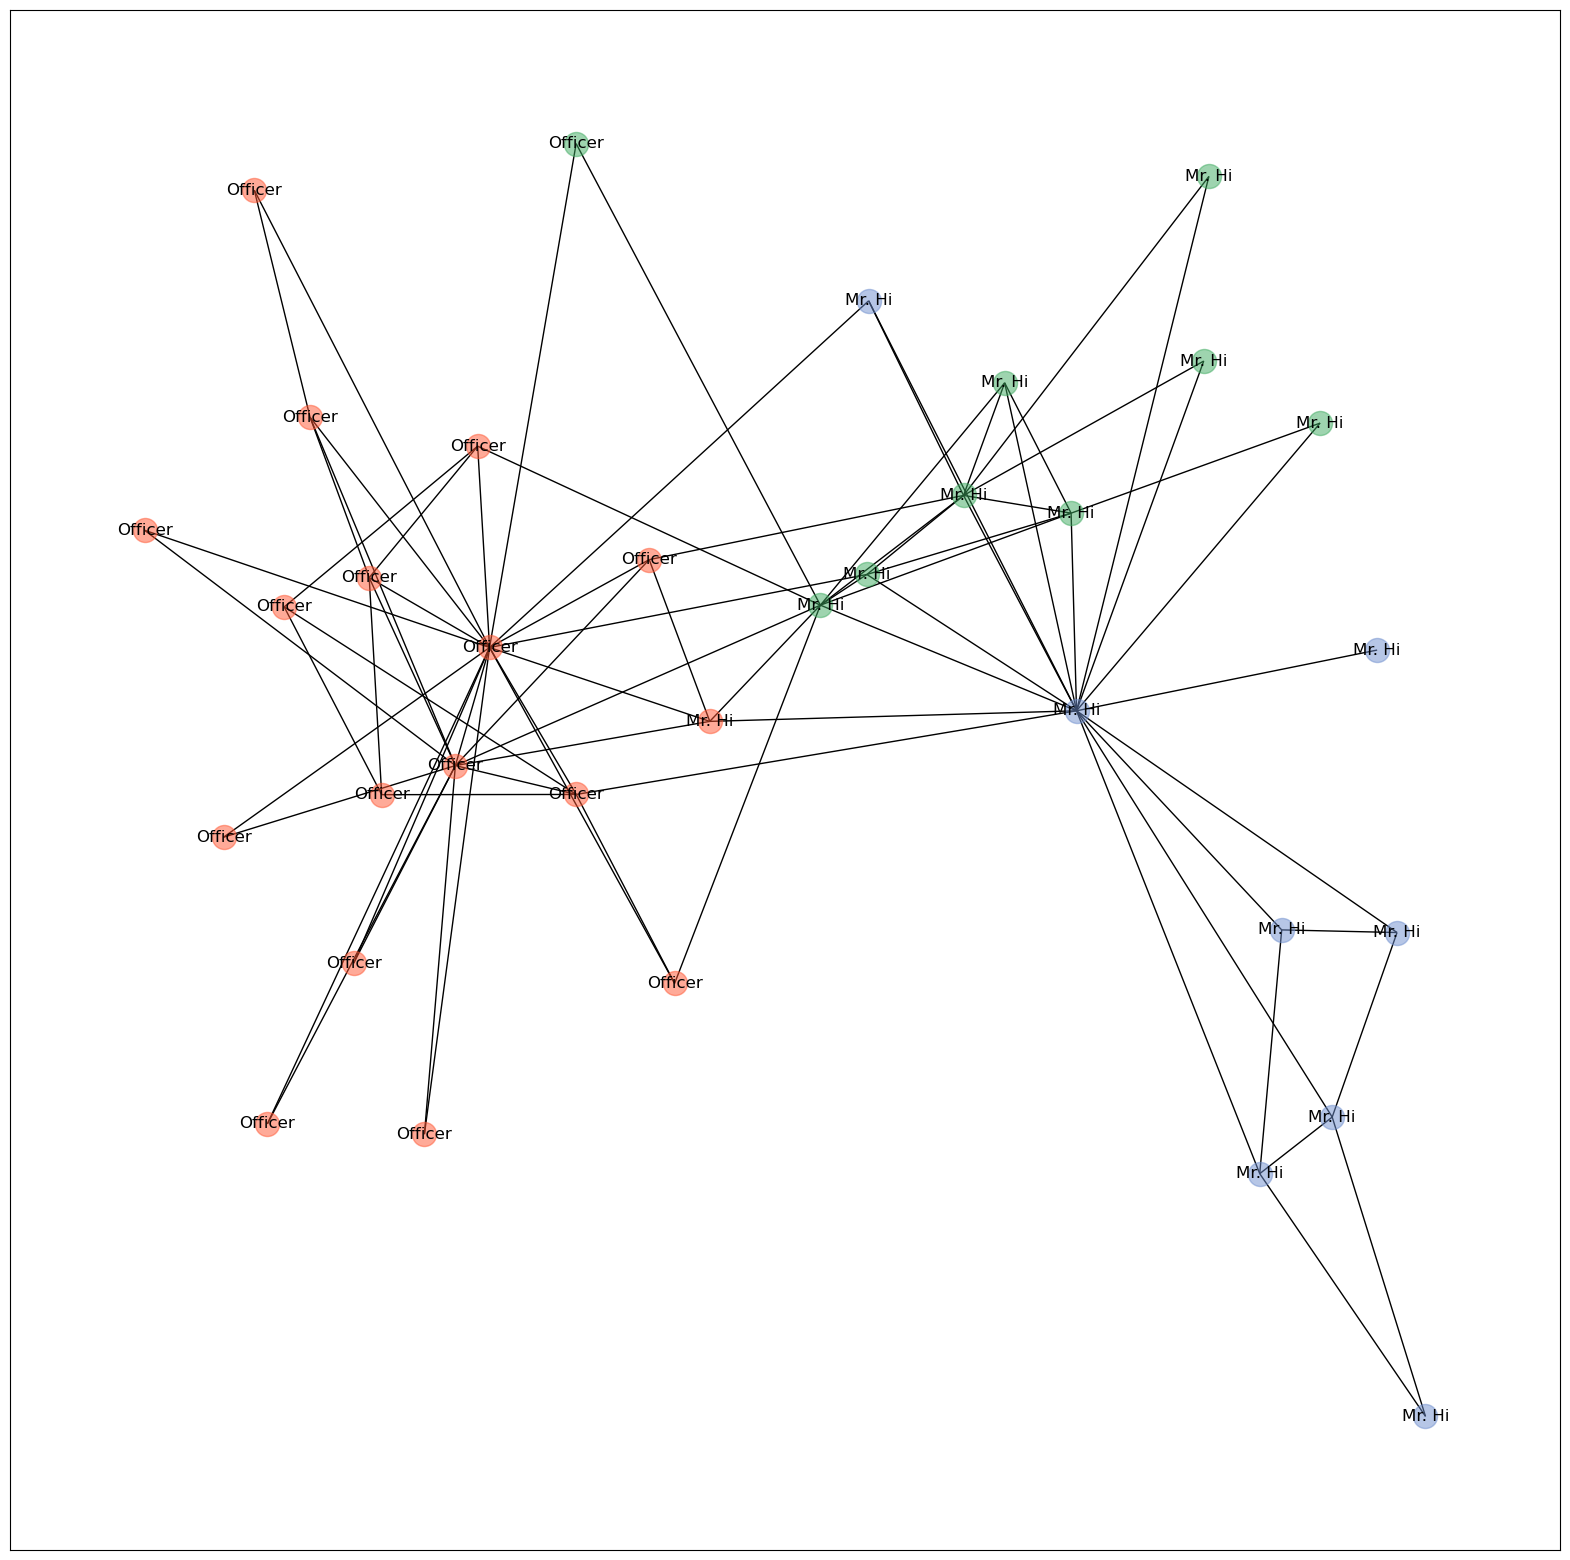

In [12]:
labels = nx.get_node_attributes(Kc_graph,'club')
plt.figure(figsize=(20,20))

#draw each set of nodes in a seperate colour
nx.draw_networkx_nodes(Kc_graph, pos, nodelist=community_0, node_color='#FF5733', alpha=0.5)
nx.draw_networkx_nodes(Kc_graph, pos, nodelist=community_1, node_color='#3FAB61', alpha=0.5)
nx.draw_networkx_nodes(Kc_graph, pos, nodelist=community_2, node_color='#6F8FCE', alpha=0.5)

#add edges to the drawing
nx.draw_networkx_edges(Kc_graph, pos)

#add lables to the drawing
nx.draw_networkx_labels(Kc_graph,pos,labels)
plt.show()

4. Create and visualize the inverted graph (G ̂) from the original graph (G). The inverted graph is created by removing all existing edges in graph G and adding all the edges that are not available in G. In other words, if two nodes are directly connected in G, they should not be connected in G ̂. Also, if they’re not directly connected in G then they should have an edge between them in G ̂

Method 1: Creating a graph with non_edges of Kc_graph

In [13]:
# create graph Ĝ
Ĝ=nx.Graph()

In [14]:
Kc_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [15]:
# set nodes for Ĝ based on nodes of Kc_graph
Ĝ.nodes = Kc_graph.nodes

In [16]:
# set edges for Ĝ based on non edges of Kc_graph
Ĝ.add_edges_from(list(nx.non_edges(Kc_graph))) 

In [17]:
nx.info(Ĝ)

/var/folders/zr/kc_sw3xj5xb_ygssw85ry0yc0000gn/T/ipykernel_78219/3122158096.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(Ĝ)


'Graph with 34 nodes and 483 edges'

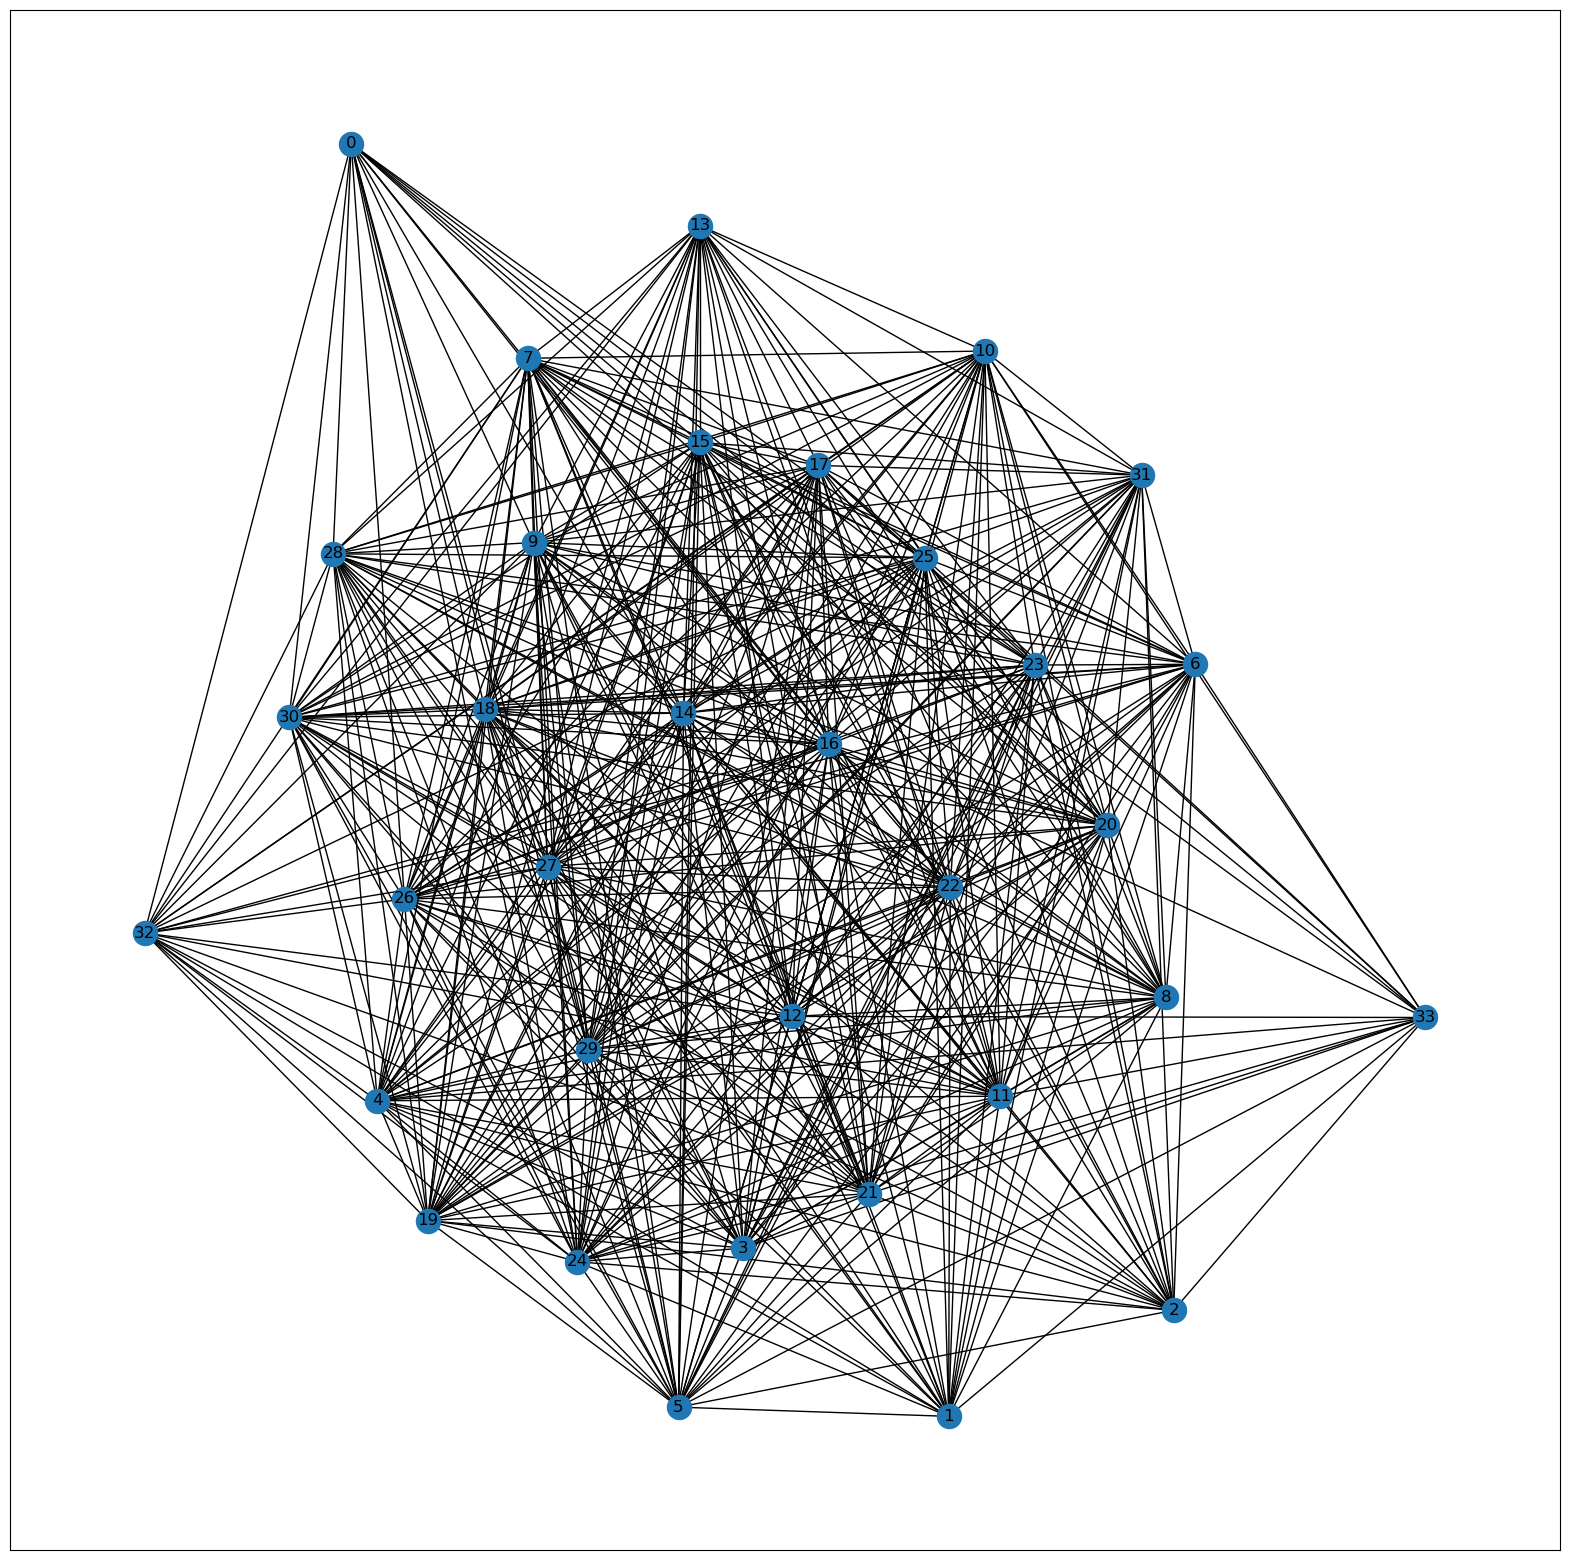

In [18]:
# visualizing the graph
plt.figure(figsize=(20, 20))
nx.draw_networkx(Ĝ)

Method 2: Creating a complete graph then removing edges existing in Kc_graph

In [19]:
# draw a complete graph with 34 nodes
Ĝ_2 = nx.complete_graph(34)

In [20]:
nx.info(Ĝ_2)

/var/folders/zr/kc_sw3xj5xb_ygssw85ry0yc0000gn/T/ipykernel_78219/828721215.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(Ĝ_2)


'Graph with 34 nodes and 561 edges'

In [21]:
# remove edges that exist in Kc_graph
Ĝ_2.remove_edges_from(Kc_graph.edges)

In [22]:
nx.info(Ĝ_2)

/var/folders/zr/kc_sw3xj5xb_ygssw85ry0yc0000gn/T/ipykernel_78219/828721215.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(Ĝ_2)


'Graph with 34 nodes and 483 edges'

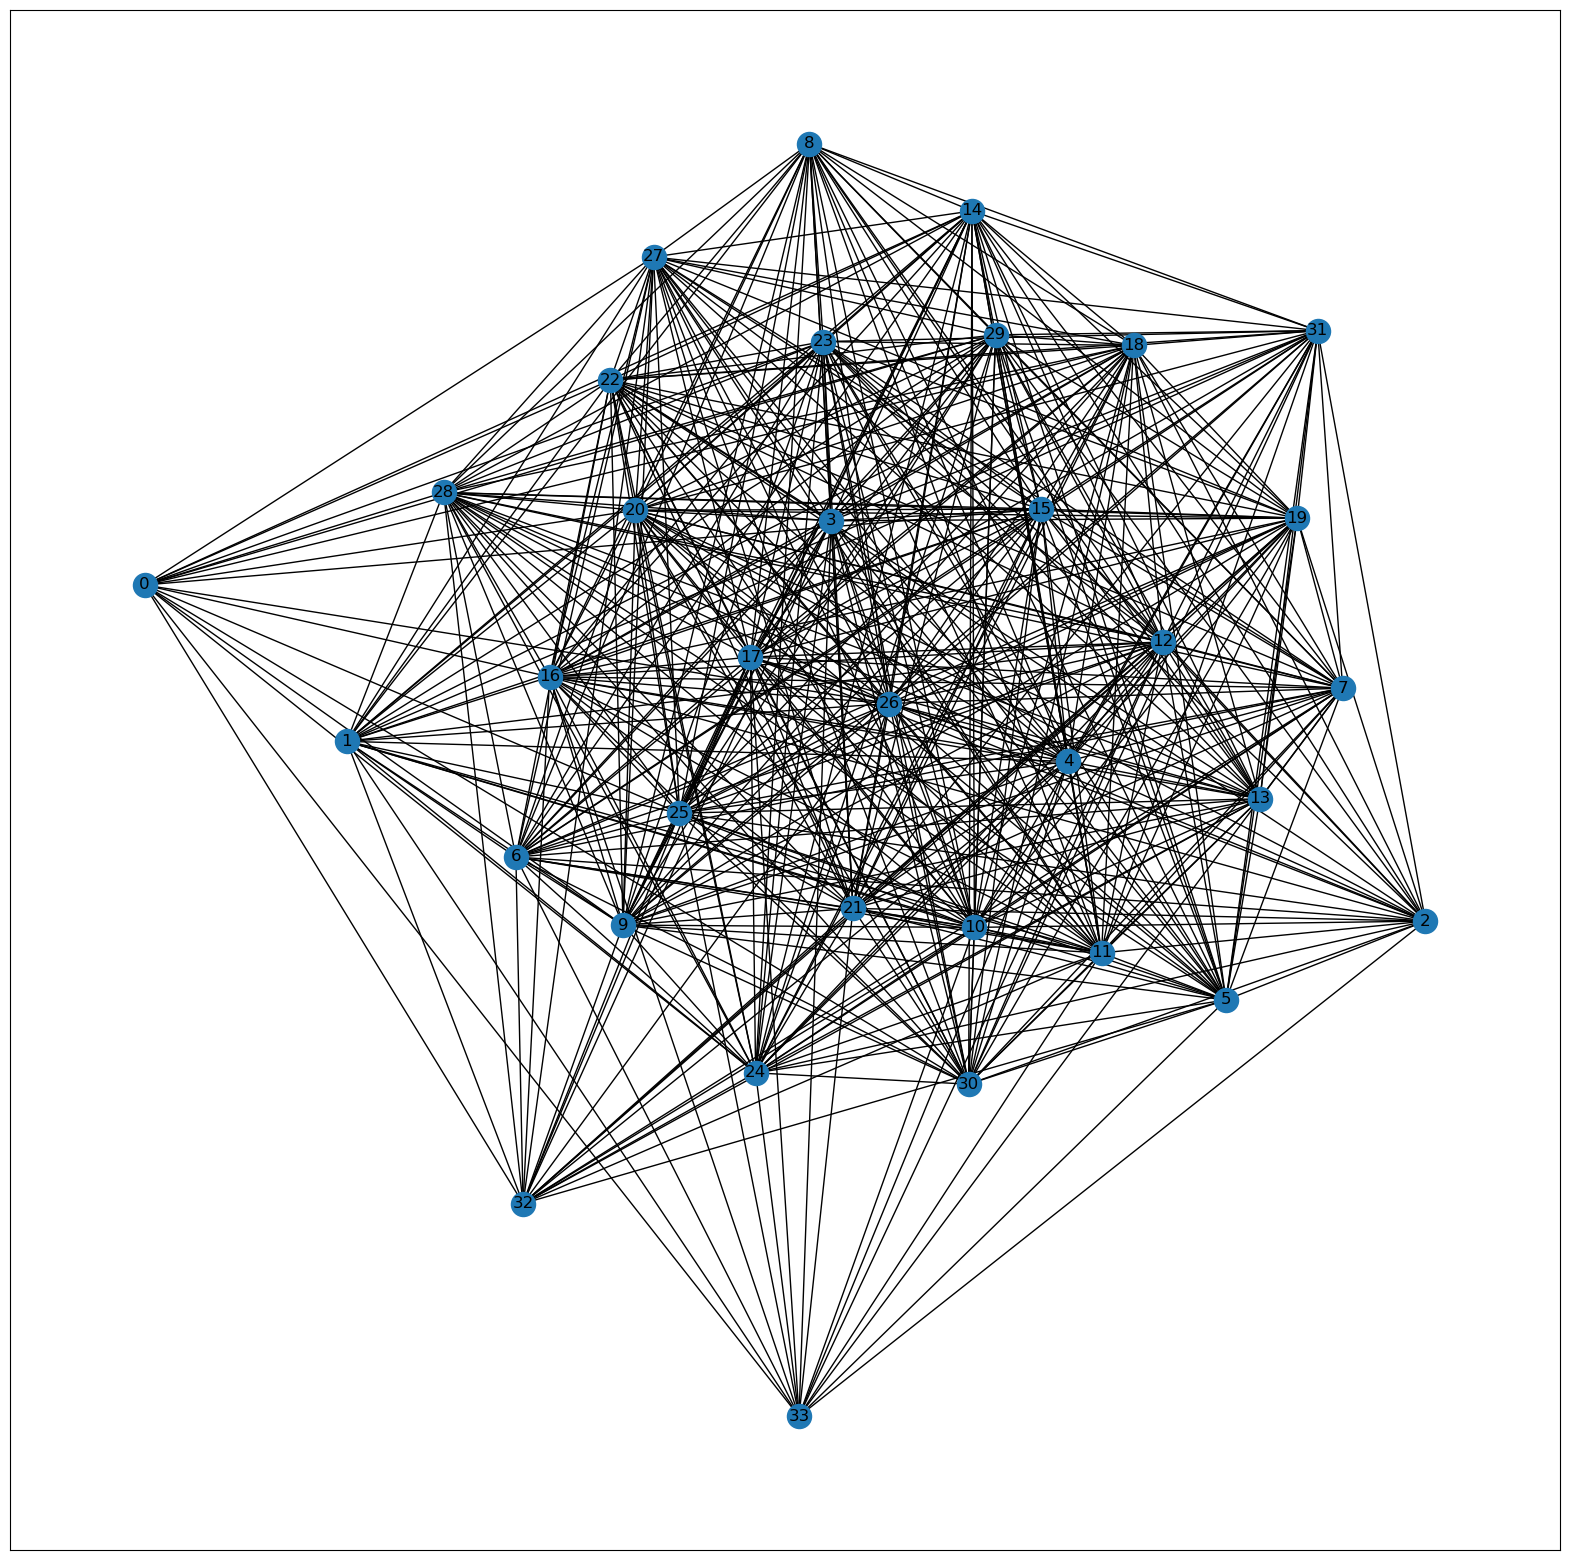

In [23]:
# visualizing the graph
plt.figure(figsize=(20, 20))
nx.draw_networkx(Ĝ_2)

5. Repeat step 3 for the inverted graph G ̂

Method 1: Community Louvain

In [24]:
g_partition = community_louvain.best_partition(Ĝ)

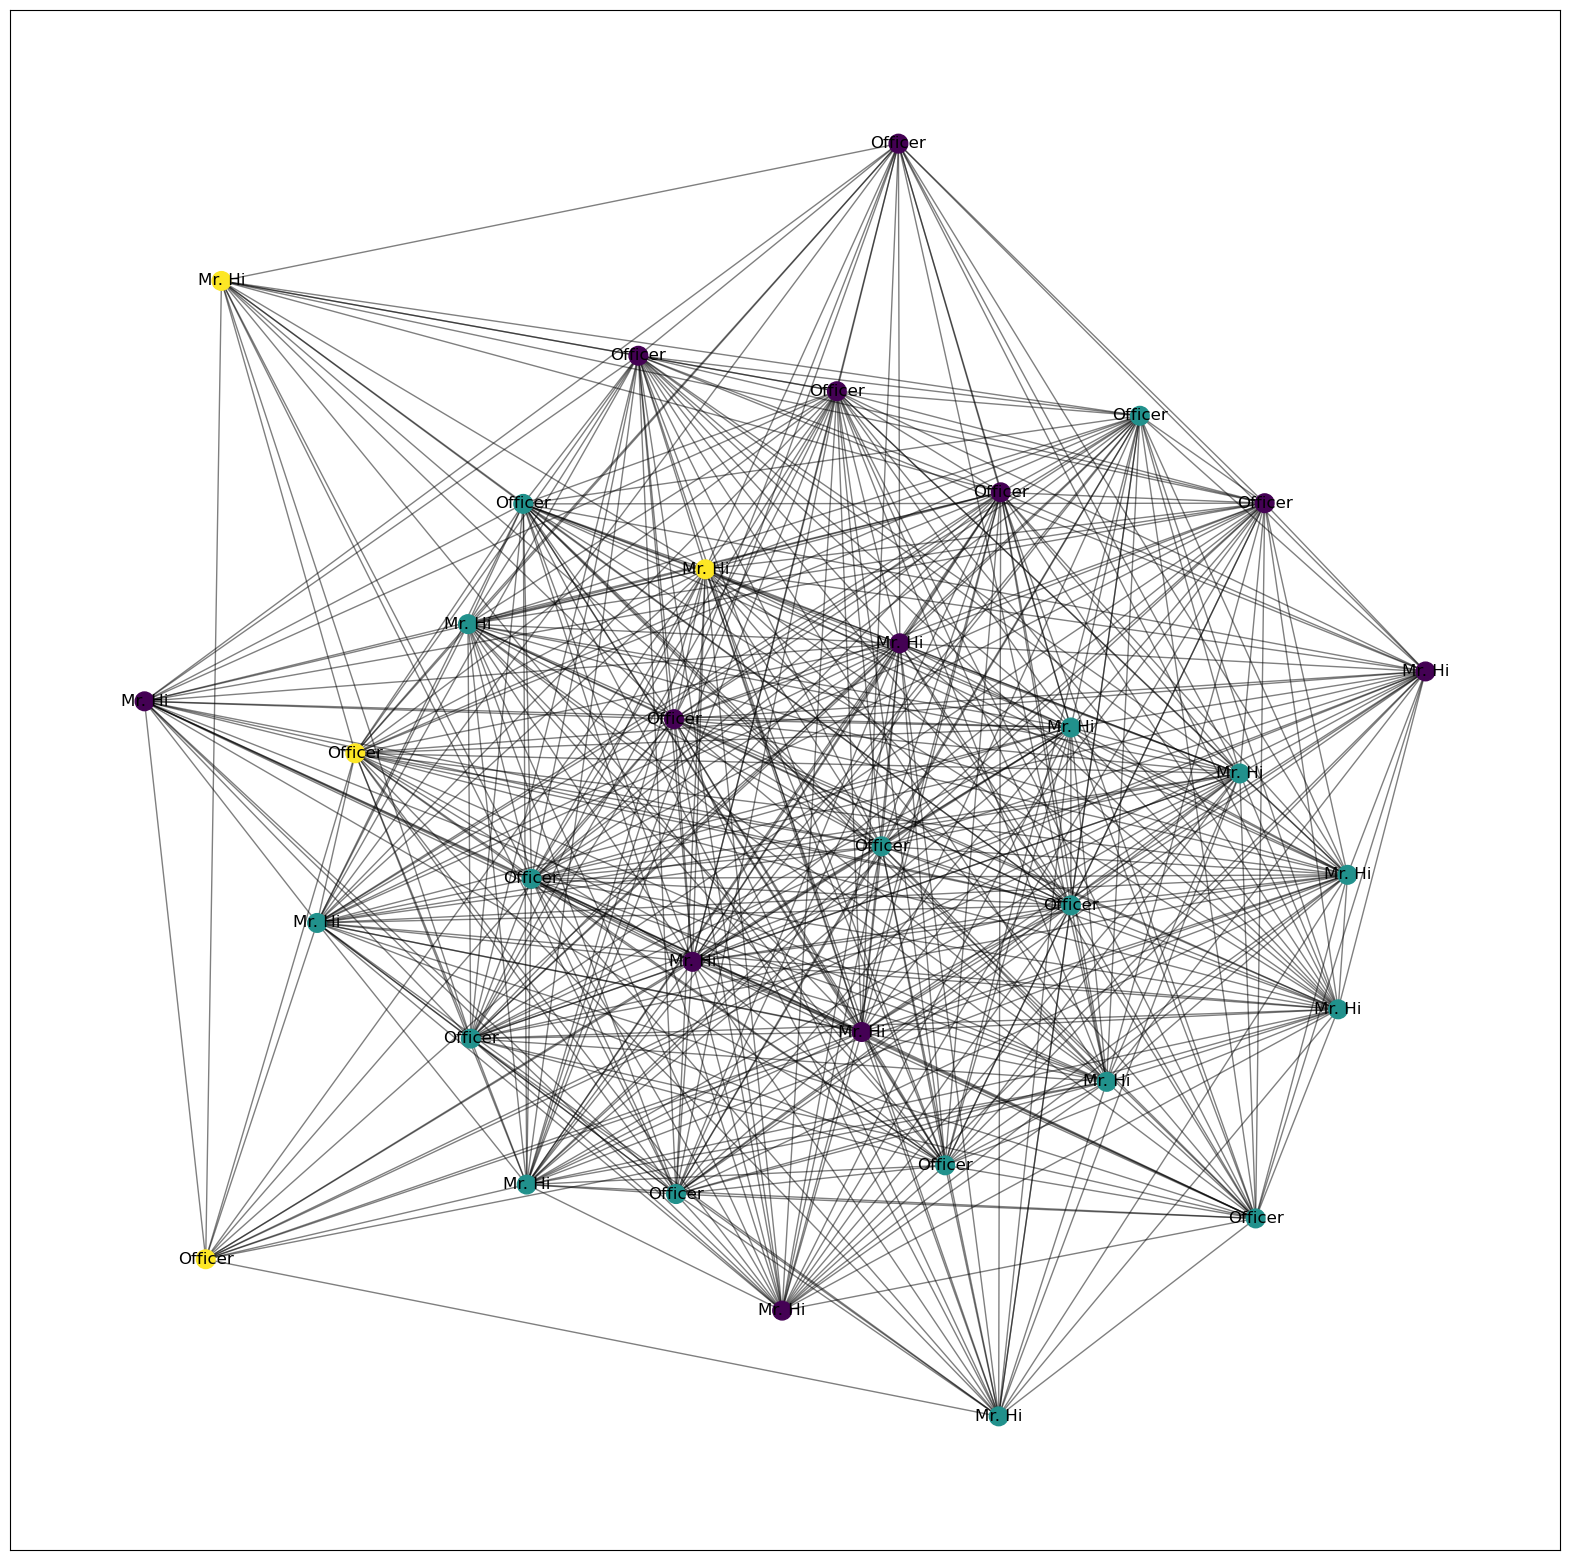

In [25]:
# draw the graph
g_labels = nx.get_node_attributes(Ĝ,'club')
g_pos = nx.spring_layout(Ĝ)
plt.figure(figsize=(20,20))

# color the nodes according to their partition
nx.draw_networkx_nodes(Ĝ, g_pos, g_partition.keys(), node_size=180,
                       node_color=list(g_partition.values()))
nx.draw_networkx_edges(Ĝ, g_pos, alpha=0.5)
nx.draw_networkx_labels(Ĝ,g_pos,g_labels)

plt.show()

Method 2: Modularity-based communities

In [26]:
# Find the communities by Modularity-based communities
g_communities = list(nxcom.greedy_modularity_communities(Ĝ))
# Count the communities
len(g_communities)

2

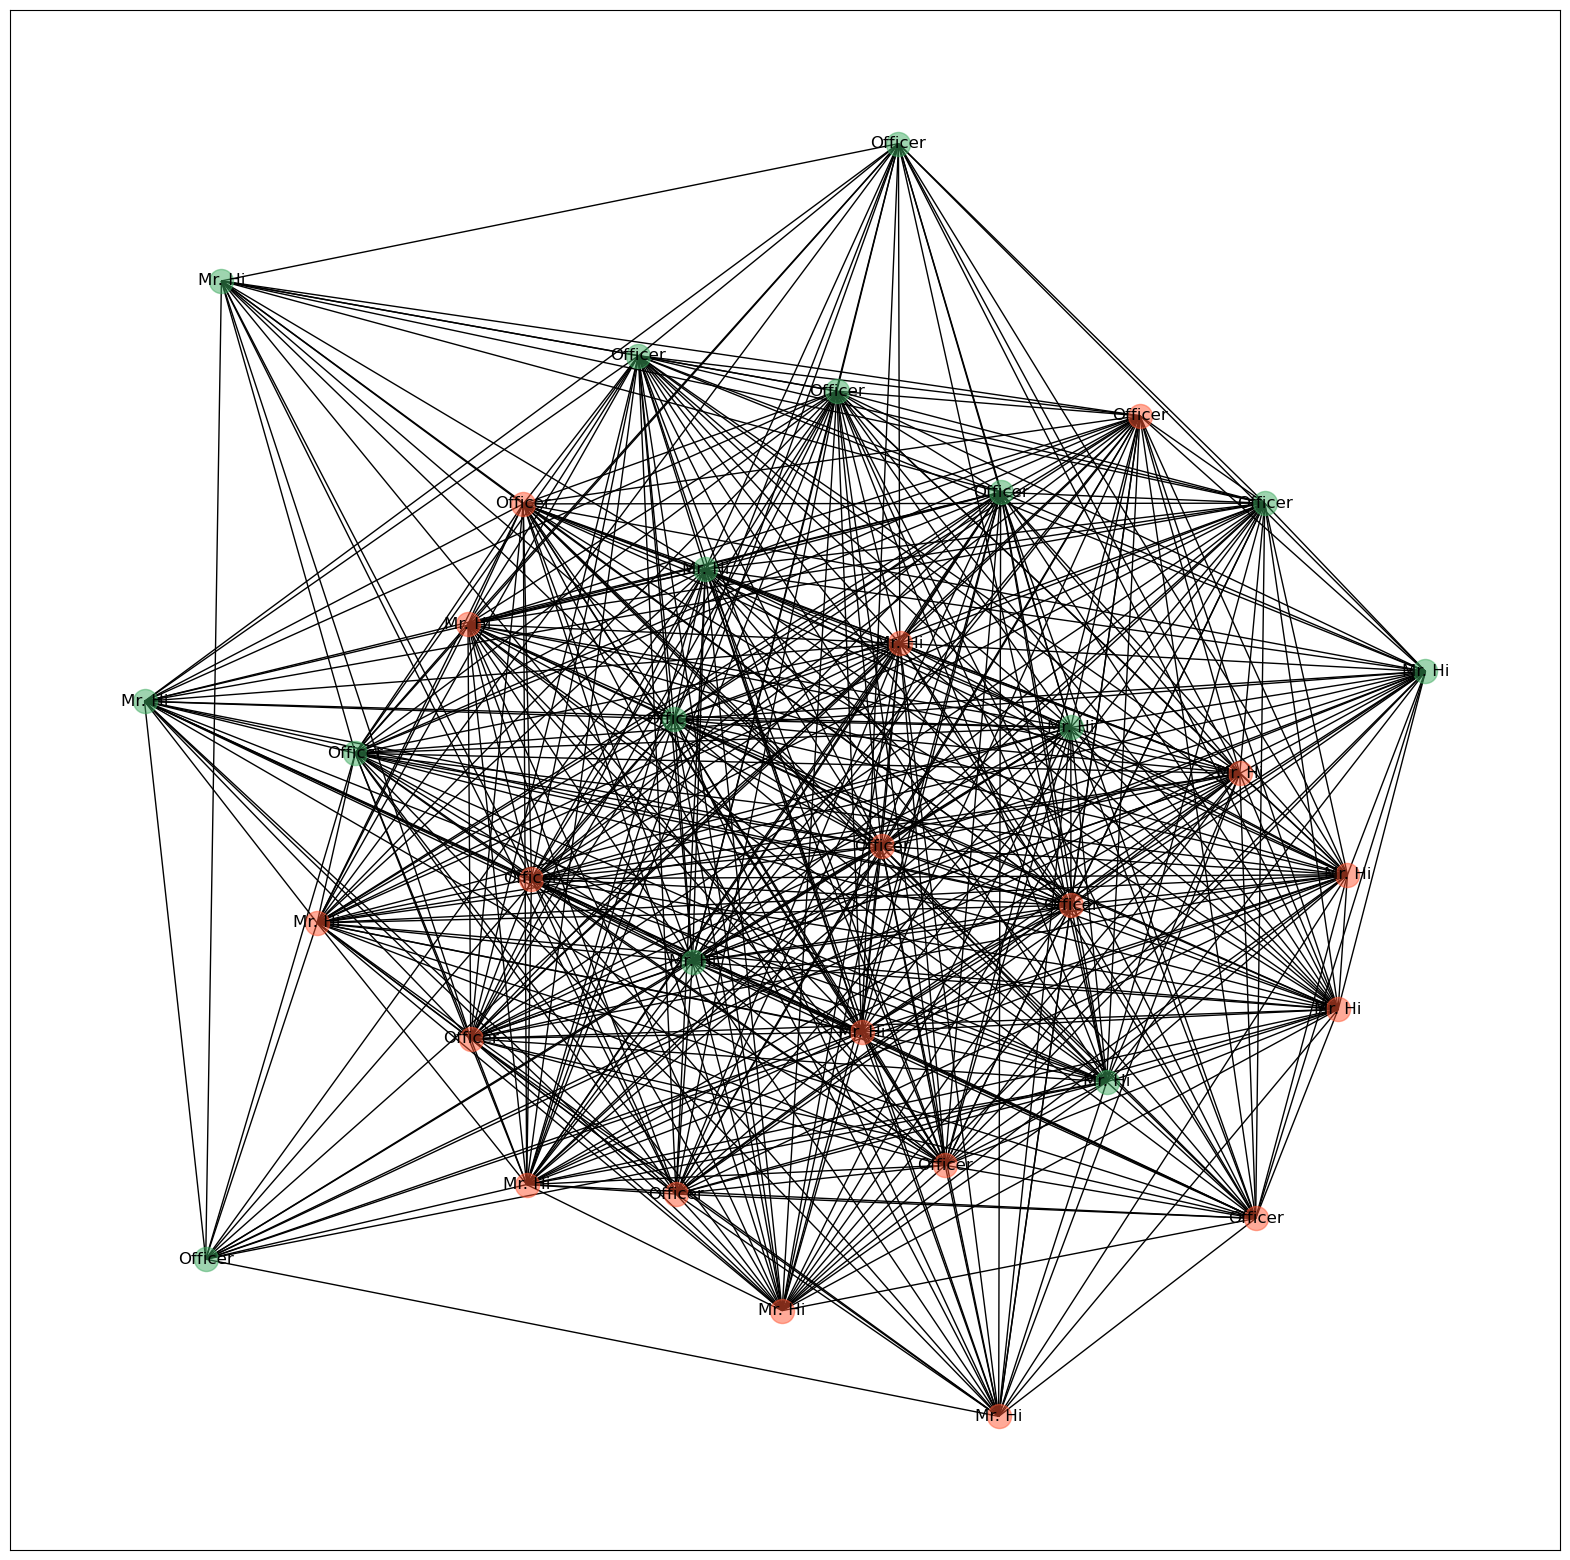

In [27]:
# categorizing nodes in communities in two lists
g_community_0 = sorted(g_communities[0])
g_community_1 = sorted(g_communities[1])

plt.figure(figsize=(20,20))

#draw each set of nodes in a seperate colour
nx.draw_networkx_nodes(Ĝ, g_pos, nodelist=g_community_0, node_color='#FF5733', alpha=0.5)
nx.draw_networkx_nodes(Ĝ, g_pos, nodelist=g_community_1, node_color='#3FAB61', alpha=0.5)

#add edges to the drawing
nx.draw_networkx_edges(Ĝ, g_pos)

#add lables to the drawing
nx.draw_networkx_labels(Ĝ, g_pos,g_labels)
plt.show()